In [1]:
import librosa
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.io import wavfile as wav
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization
from tqdm import tqdm


C:\Users\Asus\AppData\Local\Temp\ipykernel_20080\1067111280.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


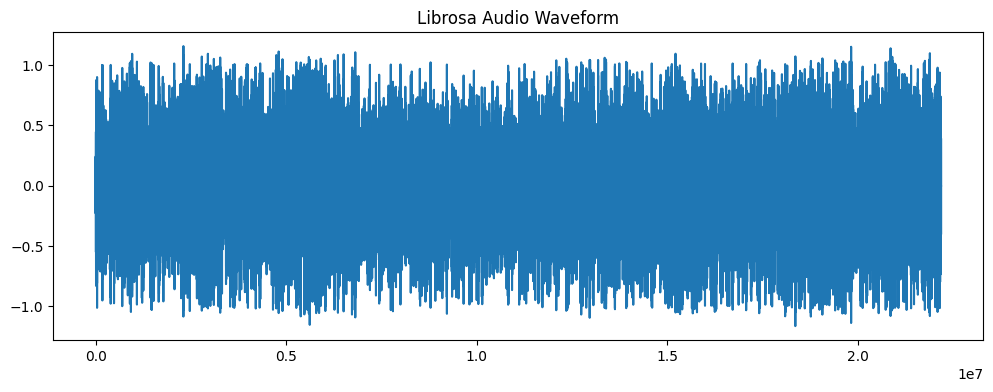

In [2]:
# Load an example audio file with librosa and plot its waveform
audio_file_path = 'Phase-1/IITG_MV_Phase-I_Speaker_Recognition_Database/100_speaker_Database_Office_Environment/disc_0/IITG_MV_Phase_I_Speaker_Recognition_Database_1/Office_Environment/Session1/English_Language/D01/1001_AD01OENC.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)
plt.title("Librosa Audio Waveform")
plt.show()

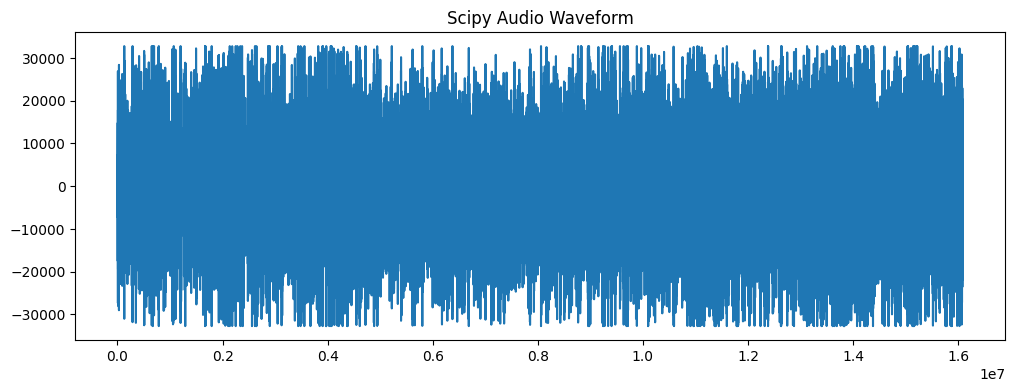

In [3]:
wave_sample_rate, wave_audio = wav.read(audio_file_path)
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)
plt.title("Scipy Audio Waveform")
plt.show()



## Training dataset

In [4]:
# Extract MFCC features from the audio file
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(f"MFCCs shape: {mfccs.shape}")



MFCCs shape: (40, 43313)


In [5]:
# Define a function to extract MFCC features from an audio file
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features



In [6]:
# Prepare your dataset for training
audio_dataset_path='Phase-1/IITG_MV_Phase-I_Speaker_Recognition_Database/100_speaker_Database_Office_Environment/disc_0/IITG_MV_Phase_I_Speaker_Recognition_Database_1/Office_Environment/'
metadata=pd.read_csv('Phase-1/IITG_MV_Phase-I_Speaker_Recognition_Database/Data/Length2000_english.csv')

import os

extracted_features = []
for index, row in tqdm(metadata.iterrows(), total=metadata.shape[0]):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), str(row["Session"]) + '/', str(row["Language"]) + '/' , str(row["Recording_Device"]) + '/' , str(row["wav_files"]))
    #data = features_extractor(file_name)
    #extracted_features.append([data, row["class_label"]])
    final_class_label1=row["wav_id"]
    final_class_label2=row["wav_files"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_label1,final_class_label2])



100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [1:07:29<00:00,  2.02s/it]


In [7]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','wav_id','wav_files'])
extracted_features_df.head()

,feature,wav_id,wav_files
0,"[-100.14327, 141.408, -90.44349, 48.122456, -2...",1001,1001_AD01OENC.wav
1,"[-93.400635, 142.4468, -93.61377, 49.428665, -...",1001,1001_AD01OENR.wav
2,"[-312.1448, 139.40472, -2.8758147, 17.192211, ...",1001,1001_AH01OENC.wav
3,"[-317.16547, 152.3441, -16.952948, 13.914769, ...",1001,1001_AH01OENR.wav
4,"[-294.5786, 137.77576, -29.958454, -15.856332,...",1001,1001_AM01OENC.wav


In [8]:
### Split the dataset into independent and dependent dataset
X_train=np.array(extracted_features_df['feature'].tolist())
y_train=np.array(extracted_features_df['wav_id'].tolist())
# z=np.array(extracted_features_df['D01'].tolist())

In [9]:
y_train.shape

(2000,)

## Testing dataset

In [10]:
# Prepare your dataset for training
audio_dataset_path='Phase-1/IITG_MV_Phase-I_Speaker_Recognition_Database/100_speaker_Database_Office_Environment/disc_0/IITG_MV_Phase_I_Speaker_Recognition_Database_1/Office_Environment/'
metadata1=pd.read_csv('Phase-1/IITG_MV_Phase-I_Speaker_Recognition_Database/Data/Length_fav_D01.csv')

import os

extracted_features1 = []
for index, row in tqdm(metadata1.iterrows(), total=metadata1.shape[0]):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), str(row["Session"]) + '/', str(row["Language"]) + '/' , str(row["Recording_Device"]) + '/' , str(row["wav_files"]))
    #data = features_extractor(file_name)
    #extracted_features.append([data, row["class_label"]])
    final_class_label1=row["wav_id"]
    final_class_label2=row["wav_files"]
    data=features_extractor(file_name)
    extracted_features1.append([data,final_class_label1,final_class_label2])



100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [09:04<00:00,  2.72s/it]


In [11]:
### converting extracted_features to Pandas dataframe
extracted_features1_df=pd.DataFrame(extracted_features1,columns=['feature','wav_id','wav_files'])
extracted_features1_df.head()

,feature,wav_id,wav_files
0,"[-95.667015, 138.71333, -83.94127, 41.06656, -...",1001,1001_AD01OKNC.wav
1,"[-320.93527, 118.18691, -61.014763, 32.62668, ...",1001,1001_BD01OKNC.wav
2,"[-311.03726, 127.12867, -66.55695, 37.974705, ...",1002,1002_AD01OHNC.wav
3,"[-320.36343, 124.806946, -66.6572, 38.813297, ...",1002,1002_BD01OHNC.wav
4,"[-300.52405, 151.92856, -96.720375, 49.438305,...",1005,1005_AD01OHNC.wav


In [12]:
#Prepare dataset for testing
audio_dataset_path='Phase-1/IITG_MV_Phase-I_Speaker_Recognition_Database/100_speaker_Database_Office_Environment/disc_0/IITG_MV_Phase_I_Speaker_Recognition_Database_1/Office_Environment/'
metadata2=pd.read_csv('Phase-1/IITG_MV_Phase-I_Speaker_Recognition_Database/Data/Length_fav_H01.csv')

import os

extracted_features2 = []
for index, row in tqdm(metadata2.iterrows(), total=metadata2.shape[0]):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), str(row["Session"]) + '/', str(row["Language"]) + '/' , str(row["Recording_Device"]) + '/' , str(row["wav_files"]))
    #data = features_extractor(file_name)
    #extracted_features.append([data, row["class_label"]])
    final_class_label1=row["wav_id"]
    final_class_label2=row["wav_files"]
    data=features_extractor(file_name)
    extracted_features2.append([data,final_class_label1,final_class_label2])

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [09:11<00:00,  2.76s/it]


In [13]:
### converting extracted_features to Pandas dataframe
extracted_features2_df=pd.DataFrame(extracted_features2,columns=['feature','wav_id','wav_files'])
extracted_features2_df.head()

,feature,wav_id,wav_files
0,"[-315.32715, 151.15099, 2.5390542, 7.4435706, ...",1001,1001_AH01OKNC.wav
1,"[-321.89377, 140.80576, -4.1249685, 15.065647,...",1001,1001_BH01OKNC.wav
2,"[-191.72925, 134.90233, -23.329948, 35.794594,...",1002,1002_AH01OHNC.wav
3,"[-191.23888, 132.5427, -23.011148, 42.761574, ...",1002,1002_BH01OHNC.wav
4,"[-188.43262, 175.30916, -36.97678, 18.092287, ...",1005,1005_AH01OHNC.wav


In [14]:
#Prepare dataset for testing
audio_dataset_path='Phase-1/IITG_MV_Phase-I_Speaker_Recognition_Database/100_speaker_Database_Office_Environment/disc_0/IITG_MV_Phase_I_Speaker_Recognition_Database_1/Office_Environment/'
metadata3=pd.read_csv('Phase-1/IITG_MV_Phase-I_Speaker_Recognition_Database/Data/Length_fav_M01.csv')

import os

extracted_features3 = []
for index, row in tqdm(metadata3.iterrows(), total=metadata3.shape[0]):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), str(row["Session"]) + '/', str(row["Language"]) + '/' , str(row["Recording_Device"]) + '/' , str(row["wav_files"]))
    #data = features_extractor(file_name)
    #extracted_features.append([data, row["class_label"]])
    final_class_label1=row["wav_id"]
    final_class_label2=row["wav_files"]
    data=features_extractor(file_name)
    extracted_features3.append([data,final_class_label1,final_class_label2])

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [08:50<00:00,  2.65s/it]


In [15]:
### converting extracted_features to Pandas dataframe
extracted_features3_df=pd.DataFrame(extracted_features3,columns=['feature','wav_id','wav_files'])
extracted_features3_df.head()

,feature,wav_id,wav_files
0,"[-309.34497, 149.04422, -25.404354, -25.778412...",1001,1001_AM01OKNC.wav
1,"[-308.84, 133.3753, -29.455133, -26.43645, 3.4...",1001,1001_BM01OKNC.wav
2,"[-269.72177, 153.61198, -36.659805, -26.767101...",1002,1002_AM01OHNC.wav
3,"[-276.39505, 162.46773, -43.75819, -28.983965,...",1002,1002_BM01OHNC.wav
4,"[-245.24681, 162.62985, -46.369274, -12.746819...",1005,1005_AM01OHNC.wav


In [16]:
#Prepare dataset for testing
audio_dataset_path='Phase-1/IITG_MV_Phase-I_Speaker_Recognition_Database/100_speaker_Database_Office_Environment/disc_0/IITG_MV_Phase_I_Speaker_Recognition_Database_1/Office_Environment/'
metadata4=pd.read_csv('Phase-1/IITG_MV_Phase-I_Speaker_Recognition_Database/Data/Length_fav_M02.csv')

import os

extracted_features4 = []
for index, row in tqdm(metadata4.iterrows(), total=metadata4.shape[0]):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), str(row["Session"]) + '/', str(row["Language"]) + '/' , str(row["Recording_Device"]) + '/' , str(row["wav_files"]))
    #data = features_extractor(file_name)
    #extracted_features.append([data, row["class_label"]])
    final_class_label1=row["wav_id"]
    final_class_label2=row["wav_files"]
    data=features_extractor(file_name)
    extracted_features4.append([data,final_class_label1,final_class_label2])

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [08:55<00:00,  2.68s/it]


In [17]:
### converting extracted_features to Pandas dataframe
extracted_features4_df=pd.DataFrame(extracted_features4,columns=['feature','wav_id','wav_files'])
extracted_features4_df.head()

,feature,wav_id,wav_files
0,"[-313.50476, 155.73637, 11.445276, -12.976183,...",1001,1001_AM02OKNC.wav
1,"[-336.22794, 154.2029, -2.945859, -15.447759, ...",1001,1001_BM02OKNC.wav
2,"[-298.75952, 158.85913, 2.250538, -15.878189, ...",1002,1002_AM02OHNC.wav
3,"[-317.9134, 164.38112, 3.7528334, -12.756791, ...",1002,1002_BM02OHNC.wav
4,"[-295.64264, 163.07422, -11.214451, -3.061794,...",1005,1005_AM02OHNC.wav


In [18]:
#Prepare dataset for testing
audio_dataset_path='Phase-1/IITG_MV_Phase-I_Speaker_Recognition_Database/100_speaker_Database_Office_Environment/disc_0/IITG_MV_Phase_I_Speaker_Recognition_Database_1/Office_Environment/'
metadata5=pd.read_csv('Phase-1/IITG_MV_Phase-I_Speaker_Recognition_Database/Data/Length_fav_T01.csv')

import os

extracted_features5 = []
for index, row in tqdm(metadata5.iterrows(), total=metadata5.shape[0]):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), str(row["Session"]) + '/', str(row["Language"]) + '/' , str(row["Recording_Device"]) + '/' , str(row["wav_files"]))
    #data = features_extractor(file_name)
    #extracted_features.append([data, row["class_label"]])
    final_class_label1=row["wav_id"]
    final_class_label2=row["wav_files"]
    data=features_extractor(file_name)
    extracted_features5.append([data,final_class_label1,final_class_label2])

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [09:08<00:00,  2.74s/it]


In [19]:
### converting extracted_features to Pandas dataframe
extracted_features5_df=pd.DataFrame(extracted_features5,columns=['feature','wav_id','wav_files'])
extracted_features5_df.head()

,feature,wav_id,wav_files
0,"[-303.09937, 151.74403, 26.174328, 1.4325702, ...",1001,1001_AT01OKNC.wav
1,"[-294.9472, 142.26245, 26.929422, 0.5703501, -...",1001,1001_BT01OKNC.wav
2,"[-258.54407, 147.74008, 23.415836, 2.6416948, ...",1002,1002_AT01OHNC.wav
3,"[-288.19934, 159.07605, 18.713999, 4.571572, -...",1002,1002_BT01OHNC.wav
4,"[-266.62302, 165.36906, 5.0311155, 4.3527803, ...",1005,1005_AT01OHNC.wav


In [20]:
### Split the dataset into independent and dependent dataset
X_test1=np.array(extracted_features1_df['feature'].tolist())
y_test1=np.array(extracted_features1_df['wav_id'].tolist())

X_test2=np.array(extracted_features2_df['feature'].tolist())
y_test2=np.array(extracted_features2_df['wav_id'].tolist())

X_test3=np.array(extracted_features3_df['feature'].tolist())
y_test3=np.array(extracted_features3_df['wav_id'].tolist())

X_test4=np.array(extracted_features4_df['feature'].tolist())
y_test4=np.array(extracted_features4_df['wav_id'].tolist())

X_test5=np.array(extracted_features5_df['feature'].tolist())
y_test5=np.array(extracted_features5_df['wav_id'].tolist())



In [21]:
y_test5.shape

(200,)

In [22]:
## Label Encoding
# y=np.array(pd.get_dummies(y))
## Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y_train=to_categorical(labelencoder.fit_transform(y_train))
y_test1=to_categorical(labelencoder.fit_transform(y_test1))
y_test2=to_categorical(labelencoder.fit_transform(y_test2))
y_test3=to_categorical(labelencoder.fit_transform(y_test3))
y_test4=to_categorical(labelencoder.fit_transform(y_test4))
y_test5=to_categorical(labelencoder.fit_transform(y_test5))

In [23]:
y_test5.shape

(200, 100)

In [24]:
y_train.shape

(2000, 100)

In [25]:
# y_train = y_train.reshape(-1)  # Flatten into a 1D array

In [26]:
# y_train.shape

In [27]:
# ## Label Encoding
# # y=np.array(pd.get_dummies(y))
# ## Label Encoder
# from tensorflow.keras.utils import to_categorical
# from sklearn.preprocessing import LabelEncoder
# labelencoder=LabelEncoder()
# y_train=to_categorical(labelencoder.fit_transform(y_train))
# y_test1=to_categorical(labelencoder.fit_transform(y_test1))
# y_test2=to_categorical(labelencoder.fit_transform(y_test2))
# y_test3=to_categorical(labelencoder.fit_transform(y_test3))
# y_test4=to_categorical(labelencoder.fit_transform(y_test4))
# y_test5=to_categorical(labelencoder.fit_transform(y_test5))

# Model Creation

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [29]:
### No of classes
num_labels=y_train.shape[1]

# CNN

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Reshape, Conv1D, Flatten

model1 = Sequential()

# Reshape input for 1D convolution
model1.add(Reshape((40, 1), input_shape=(40,)))

# First convolutional layer
model1.add(Conv1D(100, kernel_size=3, activation='relu'))
# model1.add(Dropout(0.15))

# Second convolutional layer
model1.add(Conv1D(200, kernel_size=3, activation='relu'))
# model1.add(Dropout(0.15))

# Third convolutional layer
model1.add(Conv1D(100, kernel_size=3, activation='relu'))
# model1.add(Dropout(0.15))

# Flatten the output before the final layer
model1.add(Flatten())

# Final layer
model1.add(Dense(num_labels))
model1.add(Activation('softmax'))

# Compile the model as needed
# model.compile(...)


In [31]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Reshape, Conv1D, Flatten

model2 = Sequential()

# Reshape input for 1D convolution
model2.add(Reshape((40, 1), input_shape=(40,)))

# First convolutional layer
model2.add(Conv1D(100, kernel_size=3, activation='relu'))
# model2.add(Dropout(0.15))

# Second convolutional layer
model2.add(Conv1D(200, kernel_size=3, activation='relu'))
# model2.add(Dropout(0.15))

# Third convolutional layer
model2.add(Conv1D(100, kernel_size=3, activation='relu'))
# model2.add(Dropout(0.15))

# Flatten the output before the final layer
model2.add(Flatten())

# Final layer
model2.add(Dense(num_labels))
model2.add(Activation('softmax'))

# Compile the model as needed
# model.compile(...)

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Reshape, Conv1D, Flatten

model3 = Sequential()

# Reshape input for 1D convolution
model3.add(Reshape((40, 1), input_shape=(40,)))

# First convolutional layer
model3.add(Conv1D(100, kernel_size=3, activation='relu'))
# model3.add(Dropout(0.15))

# Second convolutional layer
model3.add(Conv1D(200, kernel_size=3, activation='relu'))
# model3.add(Dropout(0.15))

# Third convolutional layer
model3.add(Conv1D(100, kernel_size=3, activation='relu'))
# model3.add(Dropout(0.15))

# Flatten the output before the final layer
model3.add(Flatten())

# Final layer
model3.add(Dense(num_labels))
model3.add(Activation('softmax'))

# Compile the model as needed
# model.compile(...)

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Reshape, Conv1D, Flatten

model4 = Sequential()

# Reshape input for 1D convolution
model4.add(Reshape((40, 1), input_shape=(40,)))

# First convolutional layer
model4.add(Conv1D(100, kernel_size=3, activation='relu'))
# model4.add(Dropout(0.1))

# Second convolutional layer
model4.add(Conv1D(200, kernel_size=3, activation='relu'))
# model4.add(Dropout(0.15))

# Third convolutional layer
model4.add(Conv1D(100, kernel_size=3, activation='relu'))
# model4.add(Dropout(0.15))

# Flatten the output before the final layer
model4.add(Flatten())

# Final layer
model4.add(Dense(num_labels))
model4.add(Activation('softmax'))

# Compile the model as needed
# model.compile(...)

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Reshape, Conv1D, Flatten

model5 = Sequential()

# Reshape input for 1D convolution
model5.add(Reshape((40, 1), input_shape=(40,)))

# First convolutional layer
model5.add(Conv1D(100, kernel_size=3, activation='relu'))
# model5.add(Dropout(0.15))

# Second convolutional layer
model5.add(Conv1D(200, kernel_size=3, activation='relu'))
# model5.add(Dropout(0.15))

# Third convolutional layer
model5.add(Conv1D(100, kernel_size=3, activation='relu'))
# model5.add(Dropout(0.15))

# Flatten the output before the final layer
model5.add(Flatten())

# Final layer
model5.add(Dense(num_labels))
model5.add(Activation('softmax'))

# Compile the model as needed
# model.compile(...)

In [35]:
model1.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model2.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model3.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model4.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model5.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [36]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 40, 1)             0         
                                                                 
 conv1d (Conv1D)             (None, 38, 100)           400       
                                                                 
 conv1d_1 (Conv1D)           (None, 36, 200)           60200     
                                                                 
 conv1d_2 (Conv1D)           (None, 34, 100)           60100     
                                                                 
 flatten (Flatten)           (None, 3400)              0         
                                                                 
 dense (Dense)               (None, 100)               340100    
                                                                 
 activation (Activation)     (None, 100)               0

In [37]:
## Trianing my model
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 15
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', verbose=1, save_best_only=True)

start = datetime.now()

# history1 = model1.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test1, y_test1), callbacks=[checkpointer], verbose=1)
# history2 = model2.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test2, y_test2), callbacks=[checkpointer], verbose=1)
# history3 = model3.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test3, y_test3), callbacks=[checkpointer], verbose=1)
# history4 = model4.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test4, y_test4), callbacks=[checkpointer], verbose=1)
# history5 = model5.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test5, y_test5), callbacks=[checkpointer], verbose=1)

models = [model1, model2, model3, model4, model5]
X_tests = [X_test1, X_test2, X_test3, X_test4, X_test5]
y_tests = [y_test1, y_test2, y_test3, y_test4, y_test5]

histories = []

for model, X_test, y_test in zip(models, X_tests, y_tests):
    history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
    histories.append(history)



duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/15


57/63 [==========================>...] - ETA: 0s - loss: 4.5057 - accuracy: 0.0395
Epoch 1: val_loss improved from inf to 3.63489, saving model to saved_models\audio_classification.hdf5


F:\Project\myenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 4s 20ms/step - loss: 4.4567 - accuracy: 0.0455 - val_loss: 3.6349 - val_accuracy: 0.1400
Epoch 2/15
62/63 [============================>.] - ETA: 0s - loss: 2.5479 - accuracy: 0.3730
Epoch 2: val_loss improved from 3.63489 to 1.68100, saving model to saved_models\audio_classification.hdf5
63/63 [==============================] - 0s 7ms/step - loss: 2.5414 - accuracy: 0.3750 - val_loss: 1.6810 - val_accuracy: 0.5650
Epoch 3/15
59/63 [===========================>..] - ETA: 0s - loss: 1.1832 - accuracy: 0.6658
Epoch 3: val_loss improved from 1.68100 to 1.31964, saving model to saved_models\audio_classification.hdf5
63/63 [==============================] - 0s 7ms/step - loss: 1.1630 - accuracy: 0.6705 - val_loss: 1.3196 - val_accuracy: 0.6300
Epoch 4/15
55/63 [=========================>....] - ETA: 0s - loss: 0.6824 - accuracy: 0.7903
Epoch 4: val_loss improved from 1.31964 to 0.79739, saving model to saved_models\audio_classification.hdf5
63/63 [==

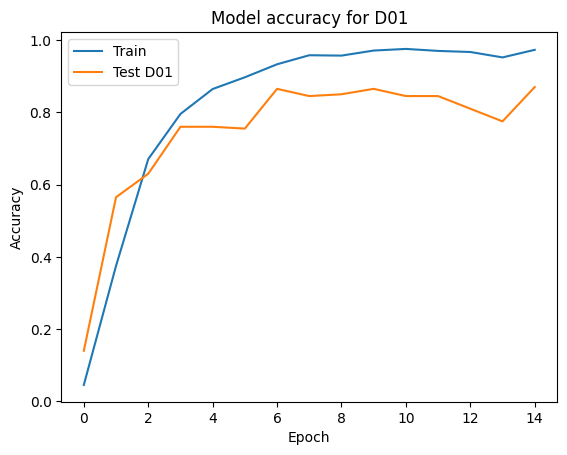

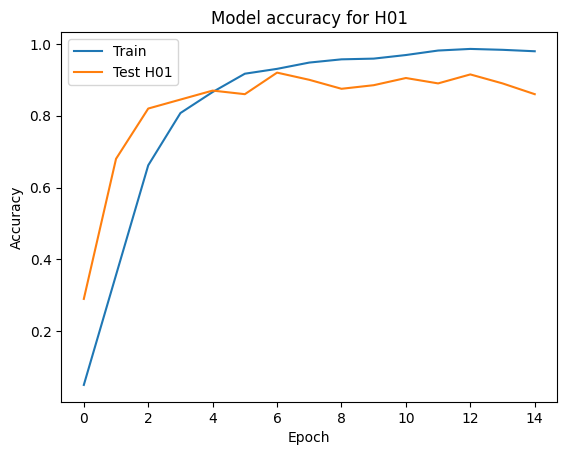

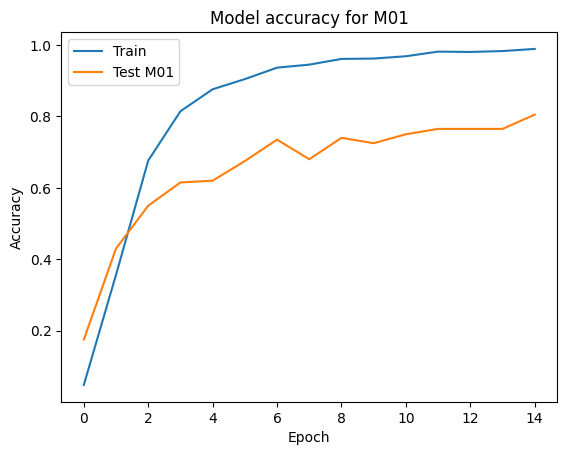

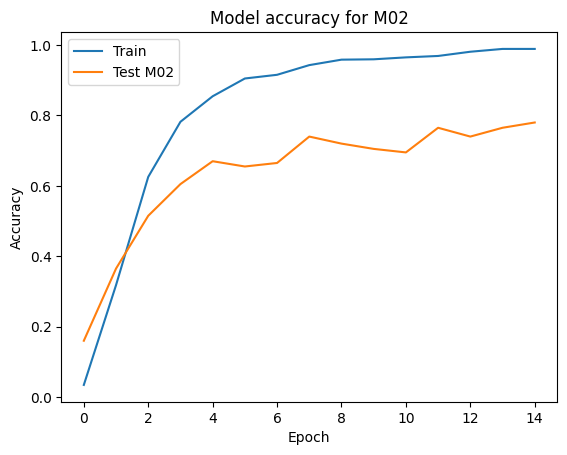

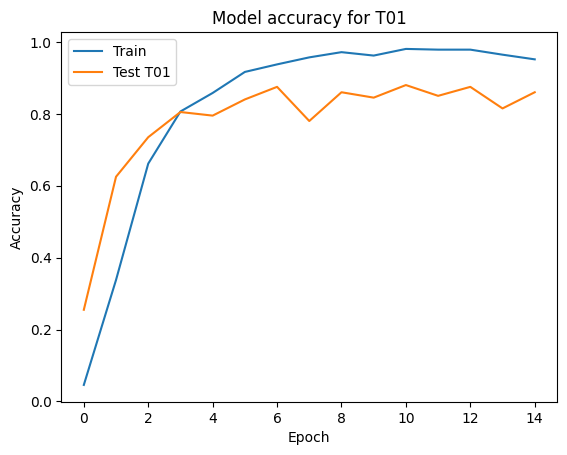

In [38]:
##ACCURACY GRAPHS
# List of history objects

model_names = ['D01', 'H01', 'M01', 'M02', 'T01']

# Plot training & validation accuracy values using a for loop
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label='Train ')
    plt.plot(history.history['val_accuracy'], label=f'Test {model_names[i]}')

    plt.title(f'Model accuracy for {model_names[i]}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()


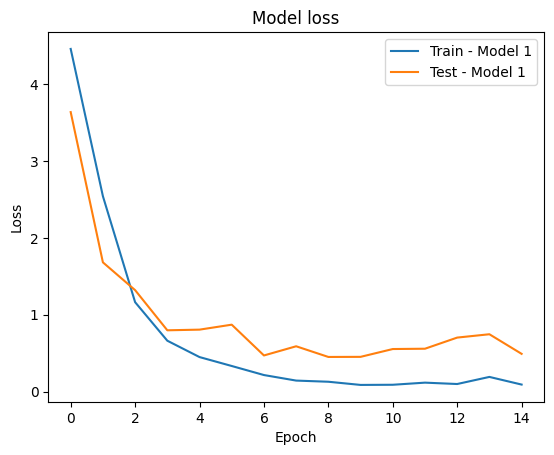

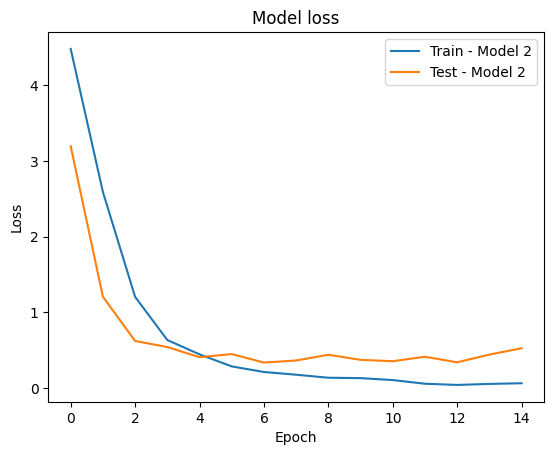

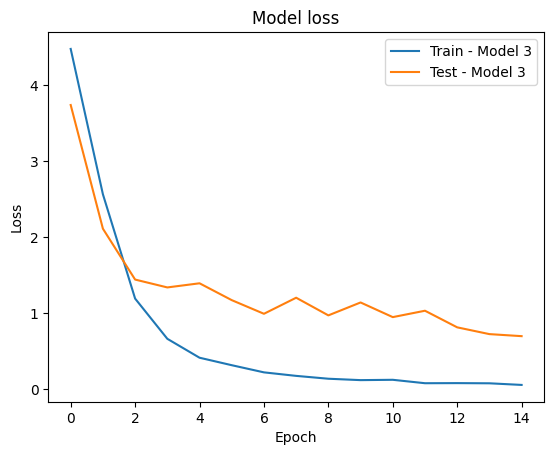

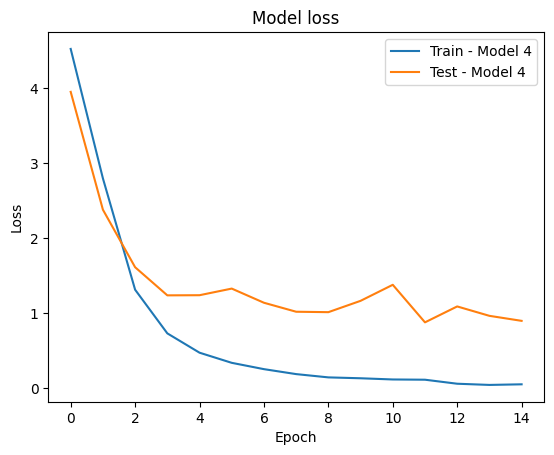

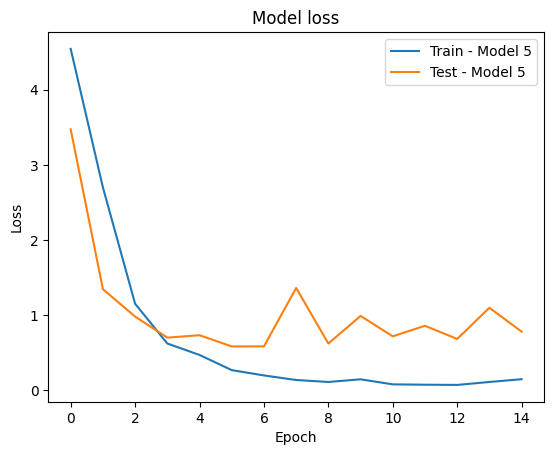

In [39]:
##LOSS GRAPHS


# Plot training & validation loss values using a for loop
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f'Train - Model {i+1}')
    plt.plot(history.history['val_loss'], label=f'Test - Model {i+1}')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

        

In [40]:
A00 = ['D01', 'H01', 'M01', 'M02', 'T01']
models = [model1, model2, model3, model4, model5]
X_tests = [X_test1, X_test2, X_test3, X_test4, X_test5]
y_tests = [y_test1, y_test2, y_test3, y_test4, y_test5]

for i, model in enumerate(models):
    test_accuracy = model.evaluate(X_tests[i], y_tests[i], verbose=0)
    print(A00[i],"::",test_accuracy[1] * 100,"%")


D01 :: 87.00000047683716 %
H01 :: 86.00000143051147 %
M01 :: 80.50000071525574 %
M02 :: 77.99999713897705 %
T01 :: 86.00000143051147 %


In [41]:
models = [model1, model2, model3, model4, model5]
X_tests = [X_test1, X_test2, X_test3, X_test4, X_test5]
y_tests = [y_test1, y_test2, y_test3, y_test4, y_test5]
model_names = ['D01', 'H01', 'M01', 'M02', 'T01']

# Iterate over models, X_tests, and y_tests using a for loop
for model, X_test, y_test, model_name in zip(models, X_tests, y_tests, model_names):
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'{model_name}:: {test_accuracy[1] * 100}%')


D01:: 87.00000047683716%
H01:: 86.00000143051147%
M01:: 80.50000071525574%
M02:: 77.99999713897705%
T01:: 86.00000143051147%


Testing some files

In [42]:
filename = "test_audio_file_1013.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Ensure the data type is compatible with the model
mfccs_scaled_features = mfccs_scaled_features.astype(np.float32)  # or np.float64, depending on your model

# Print information
print("MFCCs Scaled Features:", mfccs_scaled_features)
print("Shape of MFCCs Scaled Features:", mfccs_scaled_features.shape)

# Make prediction
predicted_label = model.predict(mfccs_scaled_features)

# Convert predicted label to class
prediction_class = labelencoder.inverse_transform(np.argmax(predicted_label, axis=1))

print("Predicted Label:", predicted_label)
print("Prediction Class:", prediction_class)


MFCCs Scaled Features: [[-3.1668890e+02  1.2656154e+02 -5.6658726e+01  3.7227005e+01
   3.0353243e+00 -2.4424360e+00  1.1297409e+01  4.6085777e+00
   5.1875052e+00  6.0683007e+00  9.7189455e+00  3.1985745e+00
   9.8919287e+00  7.1110897e+00  9.1780653e+00  9.6136560e+00
   6.5556865e+00  8.9031048e+00  4.8793101e+00  5.5010357e+00
   1.5477057e+00  4.2946162e+00  4.5886550e+00  3.5558717e+00
   5.2506781e+00  1.0357383e+00  3.8019183e+00  3.1058452e+00
   2.2759073e+00  2.1370933e+00  2.4752445e+00  3.0079191e+00
   6.1973202e-01  1.2244722e+00  5.9739792e-01  1.6443714e+00
  -3.4610257e-02 -8.1562561e-01  1.1703395e+00  4.5940140e-01]]
Shape of MFCCs Scaled Features: (1, 40)
1/1 [==============================] - 0s 111ms/step
Predicted Label: [[8.39300901e-06 1.53210658e-05 2.54981558e-07 1.95613143e-06
  7.74559012e-08 9.55959976e-01 1.04863764e-04 1.06282923e-05
  6.15068984e-06 1.48445343e-16 2.20183647e-05 9.68519249e-04
  1.09024872e-11 3.10383456e-07 1.73528303e-09 1.85040117e-

# RawNet

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40, 1)]           0         
                                                                 
 conv1d_15 (Conv1D)          (None, 38, 32)            128       
                                                                 
 batch_normalization (Batch  (None, 38, 32)            128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 38, 32)            0         
                                                                 
 gru (GRU)                   (None, 64)                18816     
                                                                 
 flatten_5 (Flatten)         (None, 64)                0         
                                                             

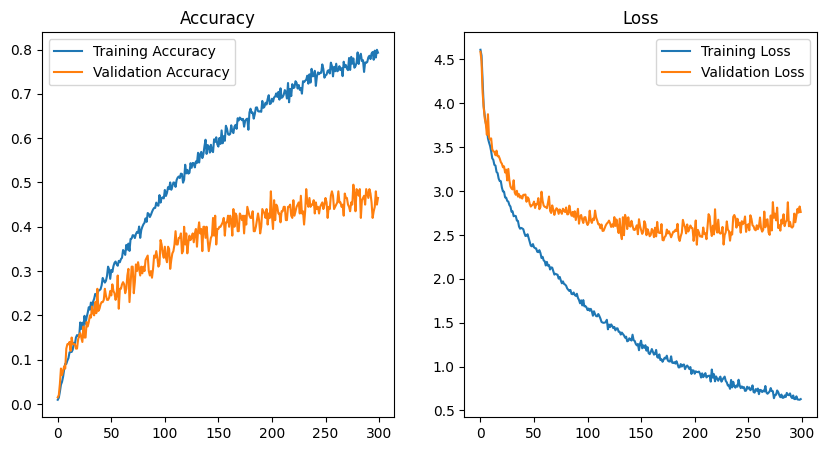

In [43]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, GRU, Flatten, Dense, Input

def build_BalancedRawNet(input_shape, num_classes):
    input_layer = Input(shape=input_shape)
    
    # Optimized Convolutional block
    x = Conv1D(32, kernel_size=3, activation='relu')(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)  # Reduced dropout rate for balance
    
    # Simplified GRU block
    x = GRU(64)(x)  # Reduced the units for efficiency
    
    # Flattening the output
    x = Flatten()(x)
    
    # Optimized Fully connected layer
    x = Dense(128, activation='relu')(x)  # Adjusted the number of neurons
    x = Dropout(0.3)(x)  # Maintaining dropout for regularization
    
    # Output layer
    output_layer = Dense(num_classes, activation='softmax')(x)
    
    # Building the model
    model = Model(inputs=input_layer, outputs=output_layer)
    
    return model

# Adjustments based on your specific dataset
num_classes = y_test1.shape[1]  # Placeholder, replace 'y' with your actual labels variable
input_shape = (X_train.shape[1], 1)  # Placeholder, replace 'X_train' with your actual input data variable

# Build the balanced RawNet model
model01 = build_BalancedRawNet(input_shape, num_classes)

# Compile the model
model01.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# View the model summary to see the optimizations
model01.summary()

# Train the model with adjusted epochs for efficiency
history01 = model01.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test1, y_test1))

test_accuracy01=model01.evaluate(X_test1,y_test1,verbose=0)
print(test_accuracy01[1]*100,'%')

# Plot accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history01.history['accuracy'], label='Training Accuracy')
plt.plot(history01.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history01.history['loss'], label='Training Loss')
plt.plot(history01.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

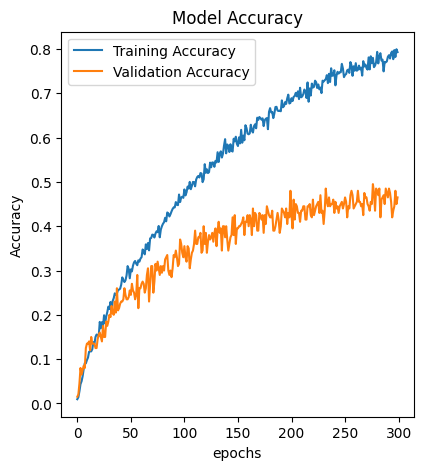

In [44]:
# Plot accuracy of model 1
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history01.history['accuracy'], label='Training Accuracy')
plt.plot(history01.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

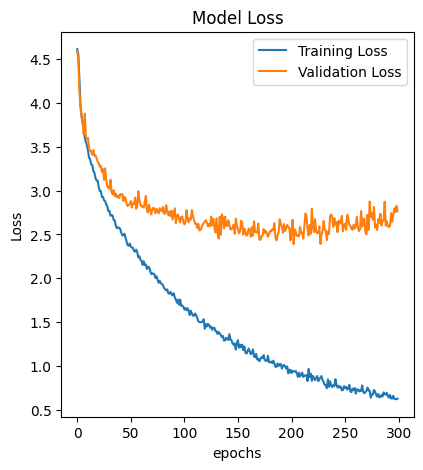

In [45]:
# Plot loss of model 1
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(history01.history['loss'], label='Training Loss')
plt.plot(history01.history['val_loss'], label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 40, 1)]           0         
                                                                 
 conv1d_16 (Conv1D)          (None, 38, 32)            128       
                                                                 
 batch_normalization_1 (Bat  (None, 38, 32)            128       
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 38, 32)            0         
                                                                 
 gru_1 (GRU)                 (None, 64)                18816     
                                                                 
 flatten_6 (Flatten)         (None, 64)                0         
                                                           

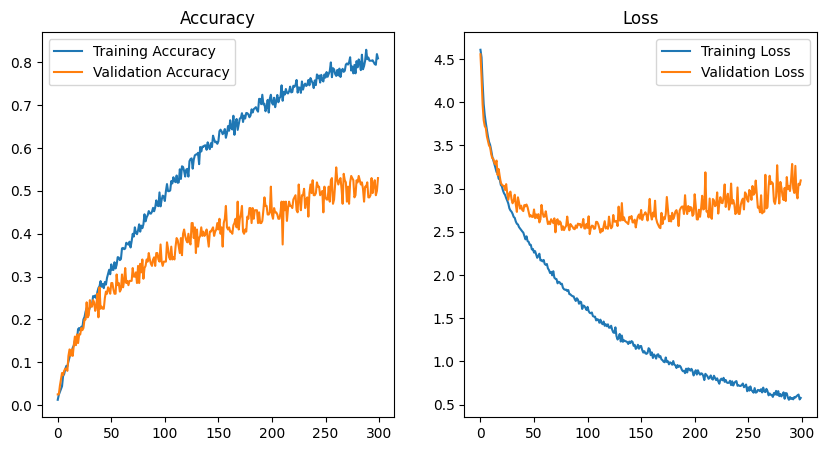

In [46]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, GRU, Flatten, Dense, Input

def build_BalancedRawNet(input_shape, num_classes):
    input_layer = Input(shape=input_shape)
    
    # Optimized Convolutional block
    x = Conv1D(32, kernel_size=3, activation='relu')(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)  # Reduced dropout rate for balance
    
    # Simplified GRU block
    x = GRU(64)(x)  # Reduced the units for efficiency
    
    # Flattening the output
    x = Flatten()(x)
    
    # Optimized Fully connected layer
    x = Dense(128, activation='relu')(x)  # Adjusted the number of neurons
    x = Dropout(0.3)(x)  # Maintaining dropout for regularization
    
    # Output layer
    output_layer = Dense(num_classes, activation='softmax')(x)
    
    # Building the model
    model = Model(inputs=input_layer, outputs=output_layer)
    
    return model

# Adjustments based on your specific dataset
num_classes = y_test2.shape[1]  # Placeholder, replace 'y' with your actual labels variable
input_shape = (X_train.shape[1], 1)  # Placeholder, replace 'X_train' with your actual input data variable

# Build the balanced RawNet model
model02 = build_BalancedRawNet(input_shape, num_classes)

# Compile the model
model02.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# View the model summary to see the optimizations
model02.summary()

# Train the model with adjusted epochs for efficiency
history02 = model02.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test2, y_test2))

test_accuracy02=model02.evaluate(X_test2,y_test2,verbose=0)
print(test_accuracy02[1]*100,'%')

# Plot accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history02.history['accuracy'], label='Training Accuracy')
plt.plot(history02.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history02.history['loss'], label='Training Loss')
plt.plot(history02.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

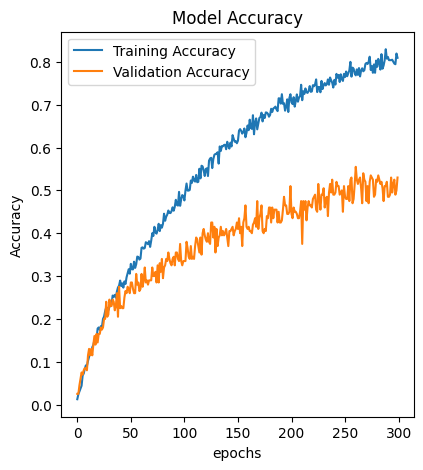

In [47]:
# Plot accuracy of model2
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history02.history['accuracy'], label='Training Accuracy')
plt.plot(history02.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

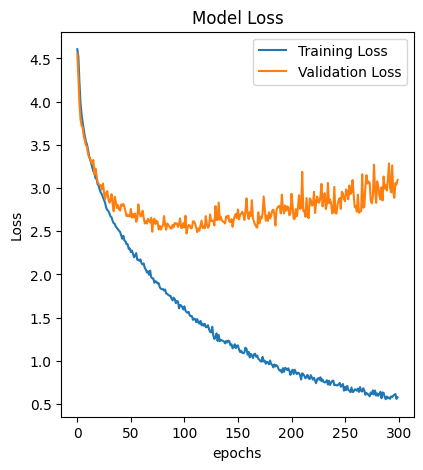

In [48]:
# Plot loss of model 2
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(history02.history['loss'], label='Training Loss')
plt.plot(history02.history['val_loss'], label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 40, 1)]           0         
                                                                 
 conv1d_19 (Conv1D)          (None, 38, 32)            128       
                                                                 
 batch_normalization_4 (Bat  (None, 38, 32)            128       
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 38, 32)            0         
                                                                 
 gru_4 (GRU)                 (None, 64)                18816     
                                                                 
 flatten_9 (Flatten)         (None, 64)                0         
                                                           

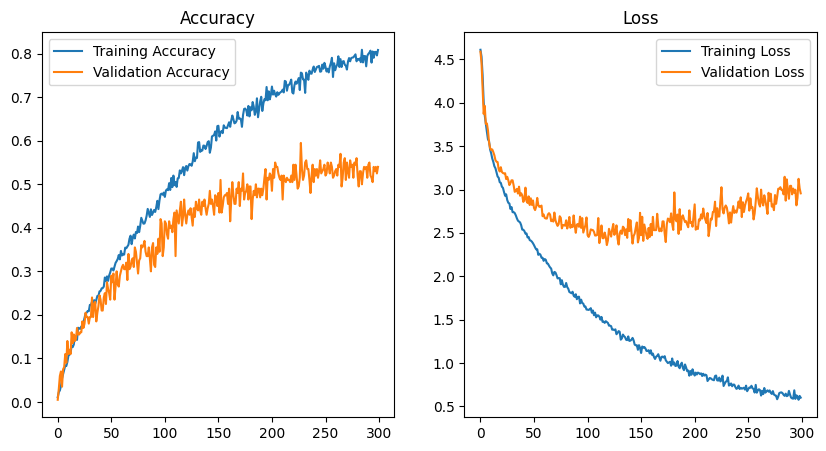

In [51]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, GRU, Flatten, Dense, Input

def build_BalancedRawNet(input_shape, num_classes):
    input_layer = Input(shape=input_shape)
    
    # Optimized Convolutional block
    x = Conv1D(32, kernel_size=3, activation='relu')(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)  # Reduced dropout rate for balance
    
    # Simplified GRU block
    x = GRU(64)(x)  # Reduced the units for efficiency
    
    # Flattening the output
    x = Flatten()(x)
    
    # Optimized Fully connected layer
    x = Dense(128, activation='relu')(x)  # Adjusted the number of neurons
    x = Dropout(0.3)(x)  # Maintaining dropout for regularization
    
    # Output layer
    output_layer = Dense(num_classes, activation='softmax')(x)
    
    # Building the model
    model = Model(inputs=input_layer, outputs=output_layer)
    
    return model

# Adjustments based on your specific dataset
num_classes = y_test3.shape[1]  # Placeholder, replace 'y' with your actual labels variable
input_shape = (X_train.shape[1], 1)  # Placeholder, replace 'X_train' with your actual input data variable

# Build the balanced RawNet model
model03 = build_BalancedRawNet(input_shape, num_classes)

# Compile the model
model03.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# View the model summary to see the optimizations
model03.summary()

# Train the model with adjusted epochs for efficiency
history03 = model03.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test3, y_test3))

test_accuracy03=model03.evaluate(X_test3,y_test3,verbose=0)
print(test_accuracy03[1]*100,'%')

# Plot accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history03.history['accuracy'], label='Training Accuracy')
plt.plot(history03.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history03.history['loss'], label='Training Loss')
plt.plot(history03.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

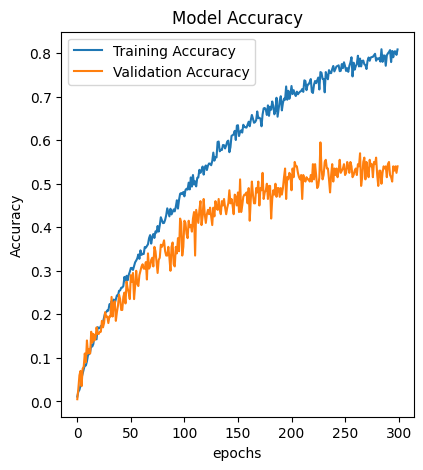

In [52]:
# Plot accuracy of model 3
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history03.history['accuracy'], label='Training Accuracy')
plt.plot(history03.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

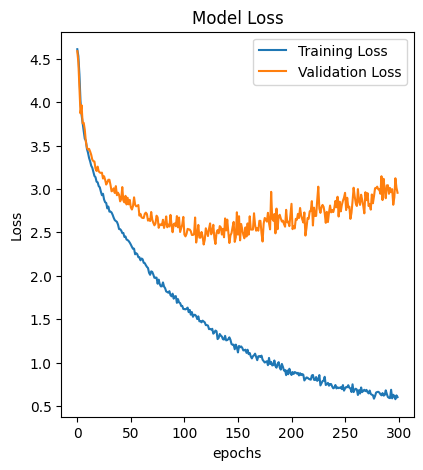

In [53]:
# Plot loss of model 3
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(history03.history['loss'], label='Training Loss')
plt.plot(history03.history['val_loss'], label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 40, 1)]           0         
                                                                 
 conv1d_20 (Conv1D)          (None, 38, 32)            128       
                                                                 
 batch_normalization_5 (Bat  (None, 38, 32)            128       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 38, 32)            0         
                                                                 
 gru_5 (GRU)                 (None, 64)                18816     
                                                                 
 flatten_10 (Flatten)        (None, 64)                0         
                                                           

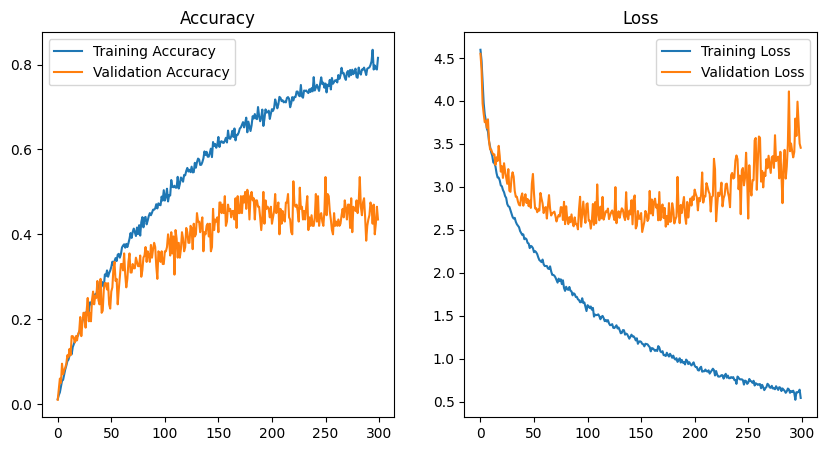

In [54]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, GRU, Flatten, Dense, Input

def build_BalancedRawNet(input_shape, num_classes):
    input_layer = Input(shape=input_shape)
    
    # Optimized Convolutional block
    x = Conv1D(32, kernel_size=3, activation='relu')(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)  # Reduced dropout rate for balance
    
    # Simplified GRU block
    x = GRU(64)(x)  # Reduced the units for efficiency
    
    # Flattening the output
    x = Flatten()(x)
    
    # Optimized Fully connected layer
    x = Dense(128, activation='relu')(x)  # Adjusted the number of neurons
    x = Dropout(0.3)(x)  # Maintaining dropout for regularization
    
    # Output layer
    output_layer = Dense(num_classes, activation='softmax')(x)
    
    # Building the model
    model = Model(inputs=input_layer, outputs=output_layer)
    
    return model

# Adjustments based on your specific dataset
num_classes = y_test4.shape[1]  # Placeholder, replace 'y' with your actual labels variable
input_shape = (X_train.shape[1], 1)  # Placeholder, replace 'X_train' with your actual input data variable

# Build the balanced RawNet model
model04 = build_BalancedRawNet(input_shape, num_classes)

# Compile the model
model04.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# View the model summary to see the optimizations
model04.summary()

# Train the model with adjusted epochs for efficiency
history04 = model04.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test4, y_test4))

test_accuracy04=model04.evaluate(X_test4,y_test4,verbose=0)
print(test_accuracy04[1]*100,'%')

# Plot accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history04.history['accuracy'], label='Training Accuracy')
plt.plot(history04.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history04.history['loss'], label='Training Loss')
plt.plot(history04.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

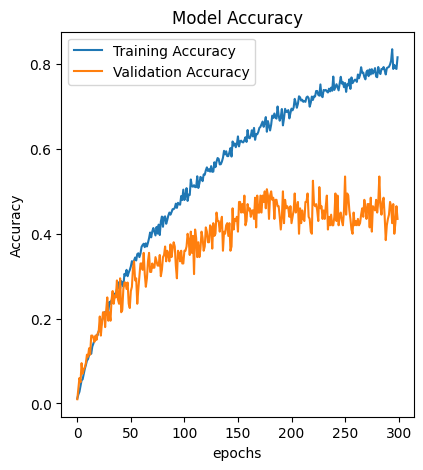

In [55]:
# Plot accuracy of model 4
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history04.history['accuracy'], label='Training Accuracy')
plt.plot(history04.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

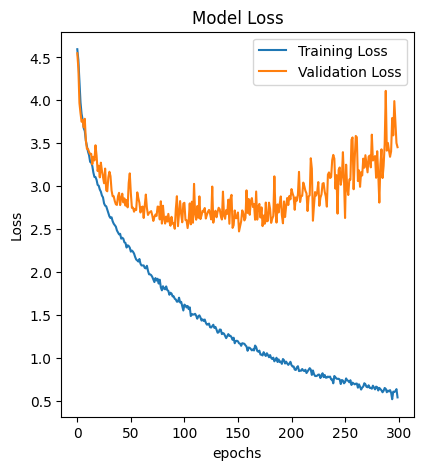

In [56]:
# Plot loss of model 4
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(history04.history['loss'], label='Training Loss')
plt.plot(history04.history['val_loss'], label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 40, 1)]           0         
                                                                 
 conv1d_21 (Conv1D)          (None, 38, 32)            128       
                                                                 
 batch_normalization_6 (Bat  (None, 38, 32)            128       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 38, 32)            0         
                                                                 
 gru_6 (GRU)                 (None, 64)                18816     
                                                                 
 flatten_11 (Flatten)        (None, 64)                0         
                                                           

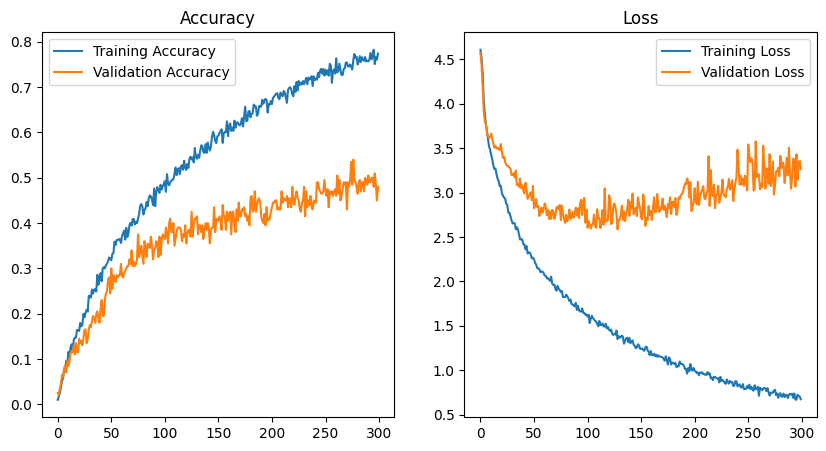

In [57]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, GRU, Flatten, Dense, Input

def build_BalancedRawNet(input_shape, num_classes):
    input_layer = Input(shape=input_shape)
    
    # Optimized Convolutional block
    x = Conv1D(32, kernel_size=3, activation='relu')(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)  # Reduced dropout rate for balance
    
    # Simplified GRU block
    x = GRU(64)(x)  # Reduced the units for efficiency
    
    # Flattening the output
    x = Flatten()(x)
    
    # Optimized Fully connected layer
    x = Dense(128, activation='relu')(x)  # Adjusted the number of neurons
    x = Dropout(0.3)(x)  # Maintaining dropout for regularization
    
    # Output layer
    output_layer = Dense(num_classes, activation='softmax')(x)
    
    # Building the model
    model = Model(inputs=input_layer, outputs=output_layer)
    
    return model

# Adjustments based on your specific dataset
num_classes = y_test5.shape[1]  # Placeholder, replace 'y' with your actual labels variable
input_shape = (X_train.shape[1], 1)  # Placeholder, replace 'X_train' with your actual input data variable

# Build the balanced RawNet model
model05 = build_BalancedRawNet(input_shape, num_classes)

# Compile the model
model05.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# View the model summary to see the optimizations
model05.summary()

# Train the model with adjusted epochs for efficiency
history05 = model05.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test5, y_test5))

test_accuracy05=model05.evaluate(X_test5,y_test5,verbose=0)
print(test_accuracy05[1]*100,'%')

# Plot accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history05.history['accuracy'], label='Training Accuracy')
plt.plot(history05.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history05.history['loss'], label='Training Loss')
plt.plot(history05.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

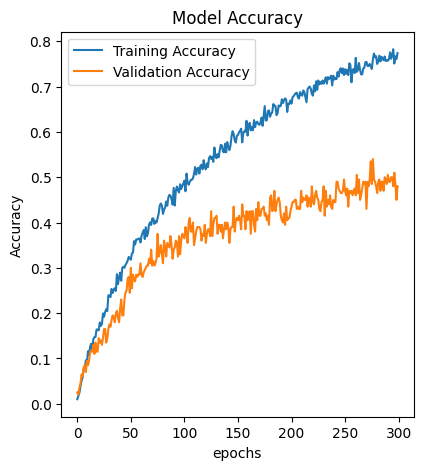

In [58]:
# Plot accuracy of model 5
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history05.history['accuracy'], label='Training Accuracy')
plt.plot(history05.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

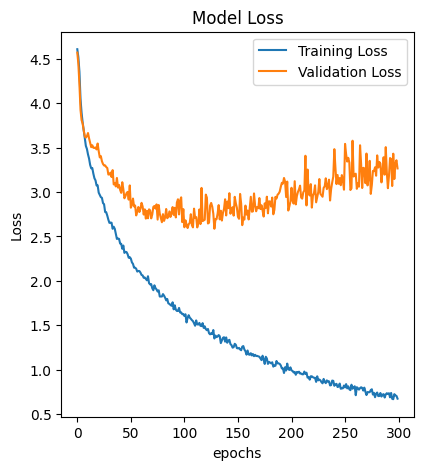

In [59]:
# Plot loss of model 5
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(history05.history['loss'], label='Training Loss')
plt.plot(history05.history['val_loss'], label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

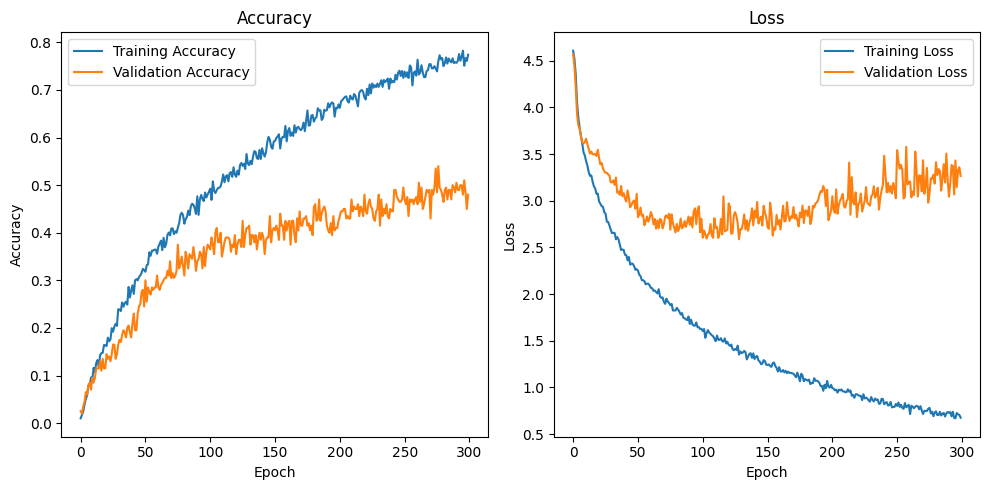

In [60]:
# Create a figure for plotting
plt.figure(figsize=(10, 5))  # Set the figure size for better visualization

# Plot accuracy on the first subplot
plt.subplot(1, 2, 1)  # Create a subplot with 1 row, 2 columns, and select the first subplot
plt.plot(history05.history['accuracy'], label='Training Accuracy')
plt.plot(history05.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')  # Add a label for the x-axis
plt.ylabel('Accuracy')  # Add a label for the y-axis
plt.legend()

# Plot loss on the second subplot
plt.subplot(1, 2, 2)  # Select the second subplot
plt.plot(history05.history['loss'], label='Training Loss')
plt.plot(history05.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')  # Add a label for the x-axis
plt.ylabel('Loss')  # Add a label for the y-axis
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping plots
plt.show()  # Display the generated plot

In [61]:
A00 = ['CNN D01', 'CNN H01', 'CNN M01', 'CNN M02', 'CNN T01']
models = [model1, model2, model3, model4, model5]
X_tests = [X_test1, X_test2, X_test3, X_test4, X_test5]
y_tests = [y_test1, y_test2, y_test3, y_test4, y_test5]

for i, model in enumerate(models):
    test_accuracy = model.evaluate(X_tests[i], y_tests[i], verbose=0)
    print(A00[i],"::",test_accuracy[1] * 100,"%")


CNN D01 :: 87.00000047683716 %
CNN H01 :: 86.00000143051147 %
CNN M01 :: 80.50000071525574 %
CNN M02 :: 77.99999713897705 %
CNN T01 :: 86.00000143051147 %


In [62]:
print('RawNet D01 = ',test_accuracy01[1]*100,'%')
print('RawNet H01 = ',test_accuracy02[1]*100,'%')
print('RawNet M01 = ',test_accuracy03[1]*100,'%')
print('RawNet M02 = ',test_accuracy04[1]*100,'%')
print('RawNet T01 = ',test_accuracy05[1]*100,'%')

RawNet D01 =  46.50000035762787 %
RawNet H01 =  52.99999713897705 %
RawNet M01 =  54.00000214576721 %
RawNet M02 =  43.50000023841858 %
RawNet T01 =  47.999998927116394 %


# --------------------------------------------------------------------------------------------

# With Max pooling

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 40, 1)]           0         
                                                                 
 conv1d_25 (Conv1D)          (None, 38, 32)            128       
                                                                 
 batch_normalization_10 (Ba  (None, 38, 32)            128       
 tchNormalization)                                               
                                                                 
 dropout_20 (Dropout)        (None, 38, 32)            0         
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 19, 32)            0         
 g1D)                                                            
                                                                 
 gru_10 (GRU)                (None, 64)                188

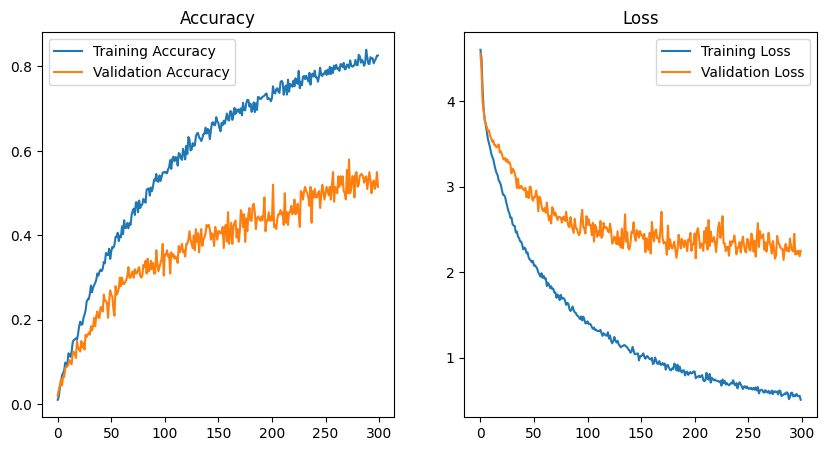

In [66]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, GRU, Flatten, Dense, Input, MaxPooling1D

def build_BalancedRawNet(input_shape, num_classes):
    input_layer = Input(shape=input_shape)

    # Optimized Convolutional block
    x = Conv1D(32, kernel_size=3, activation='relu')(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)  # Reduced dropout rate for balance

    # Max Pooling added here
    x = MaxPooling1D(pool_size=2)(x)  # Downsample features by a factor of 2

    # Simplified GRU block
    x = GRU(64)(x)  # Reduced the units for efficiency

    # Flattening the output
    x = Flatten()(x)

    # Optimized Fully connected layer
    x = Dense(128, activation='relu')(x)  # Adjusted the number of neurons
    x = Dropout(0.3)(x)  # Maintaining dropout for regularization

    # Output layer
    output_layer = Dense(num_classes, activation='softmax')(x)

    # Building the model
    model = Model(inputs=input_layer, outputs=output_layer)

    return model


# Adjustments based on your specific dataset
num_classes = y_test5.shape[1]  # Placeholder, replace 'y' with your actual labels variable
input_shape = (X_train.shape[1], 1)  # Placeholder, replace 'X_train' with your actual input data variable

# Build the balanced RawNet model
model06 = build_BalancedRawNet(input_shape, num_classes)

# Compile the model
model06.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# View the model summary to see the optimizations
model06.summary()

# Train the model with adjusted epochs for efficiency
history06 = model06.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test5, y_test5))

test_accuracy06=model06.evaluate(X_test5,y_test5,verbose=0)
print(test_accuracy06[1]*100,'%')

# Plot accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history06.history['accuracy'], label='Training Accuracy')
plt.plot(history06.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history06.history['loss'], label='Training Loss')
plt.plot(history06.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
